In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
jury = {"Ethnicity":["Asian","Black","Latino","White","Other"],"Eligible":[0.15,0.18,0.12,0.54,0.01],"Panels":[0.26,0.08,0.08,0.54,0.04]}
jury

{'Ethnicity': ['Asian', 'Black', 'Latino', 'White', 'Other'],
 'Eligible': [0.15, 0.18, 0.12, 0.54, 0.01],
 'Panels': [0.26, 0.08, 0.08, 0.54, 0.04]}

In [ ]:
Alameda_df = pd.DataFrame(jury)
Alameda_df

,Ethnicity,Eligible,Panels
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


In [ ]:
Alameda_df_1 = Alameda_df.set_index('Ethnicity')
Alameda_df_1

,Eligible,Panels
Ethnicity,,
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


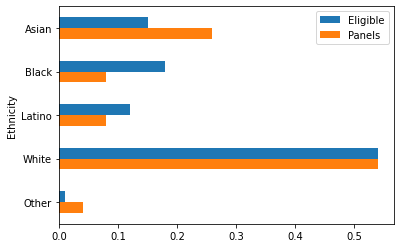

In [ ]:
Alameda_df_1 .plot.barh()
plt.ylabel('Ethnicity')
plt.gca().invert_yaxis()

In [ ]:
Alameda_df_1['jury_with_diffs'] = Alameda_df_1['Panels']-Alameda_df_1['Eligible']
Alameda_df_1

,Eligible,Panels,jury_with_diffs
Ethnicity,,,
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.10
Latino,0.12,0.08,-0.04
White,0.54,0.54,0.00
Other,0.01,0.04,0.03


In [ ]:
Alameda_df_1['Abs.Difference']=abs(Alameda_df_1['jury_with_diffs'])
Alameda_df_1

,Eligible,Panels,jury_with_diffs,Abs.Difference
Ethnicity,,,,
Asian,0.15,0.26,0.11,0.11
Black,0.18,0.08,-0.10,0.10
Latino,0.12,0.08,-0.04,0.04
White,0.54,0.54,0.00,0.00
Other,0.01,0.04,0.03,0.03


In [ ]:
test_statistic = Alameda_df_1['Abs.Difference'].sum()/2
test_statistic

0.14

In [ ]:
import numpy as np
def total_variation_distance(distribution_1, distribution_2):
    return np.abs(distribution_1 - distribution_2).sum()/2

In [ ]:
def table_tvd(table, label, other):
    return total_variation_distance(table[label], table[other])

observed_stat =table_tvd(Alameda_df, 'Eligible', 'Panels')
print(observed_stat)

0.14


In [ ]:
panel_size = 1453

In [ ]:
import numpy.random as npr
np.random.multinomial(1453,[0.15,0.18,0.12,0.54,0.01])

array([218, 257, 178, 788,  12])

In [ ]:
Alameda_df_2 = pd.DataFrame(Alameda_df_1,columns = ['Eligible','Panels'])

In [ ]:
Alameda_df_2['Random Sample'] = np.random.multinomial(1453,[0.15,0.18,0.12,0.54,0.01])/1453
Alameda_df_2

,Eligible,Panels,Random Sample
Ethnicity,,,
Asian,0.15,0.26,0.172058
Black,0.18,0.08,0.168617
Latino,0.12,0.08,0.125258
White,0.54,0.54,0.522368
Other,0.01,0.04,0.011700


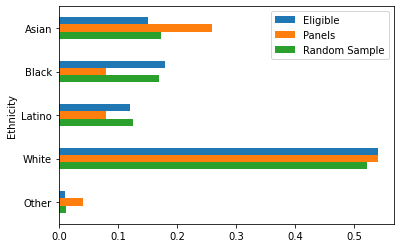

In [ ]:
Alameda_df_2.plot.barh()
plt.ylabel('Ethnicity')
plt.gca().invert_yaxis()

In [ ]:
TVD = (abs(Alameda_df_2['Eligible']-Alameda_df_2['Random Sample'])).sum()/2
TVD

0.029015829318651105

In [ ]:
simulations = 5000
tvd_list=[]
for i in np.arange(simulations):
    Alameda_df_2["Random Sample"]=(npr.multinomial(1453,[0.15, 0.18, 0.12, 0.54, 0.01]))/panel_size
    tvd_list.append(table_tvd(Alameda_df_2, 'Eligible', 'Random Sample'))
    
tvd_list

[0.005980729525120463,
 0.017136958017893958,
 0.01604267033723326,
 0.021954576737783886,
 0.016200963523743978,
 0.01553337921541641,
 0.012828630419821095,
 0.00699242945629734,
 0.01825189263592569,
 0.018506538196834142,
 0.015251204404679988,
 0.017309015829318687,
 0.024074328974535472,
 0.019256710254645572,
 0.008327598072952502,
 0.012339986235375067,
 0.02057811424638675,
 0.013551273227804531,
 0.022608396421197524,
 0.016847900894700615,
 0.013337921541637958,
 0.011348933241569159,
 0.00996558843771505,
 0.017192016517549934,
 0.014810736407432908,
 0.027790777701307588,
 0.009972470750172017,
 0.027639366827253986,
 0.03054370268410182,
 0.015615966964900217,
 0.01658637302133516,
 0.024562973158981455,
 0.01339298004129386,
 0.014466620784583606,
 0.020997935306262903,
 0.031548520302821716,
 0.013551273227804568,
 0.006407432897453538,
 0.013812801101169947,
 0.02690984170681353,
 0.018224363386097696,
 0.011651754989676555,
 0.011486579490708887,
 0.00677907777013072,

In [ ]:
tvd_final_df=pd.DataFrame(tvd_list)
tvd_final_df.rename(columns={0:"TVD"},inplace=True) # renaming column
tvd_final_df.head()

,TVD
0,0.005981
1,0.017137
2,0.016043
3,0.021955
4,0.016201


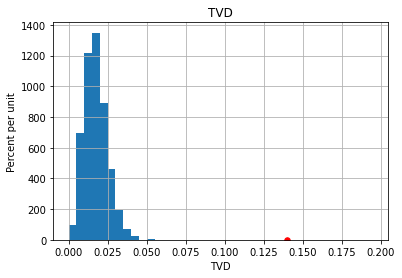

In [ ]:
tvd_final_df.hist(bins=np.arange(0,0.2,0.005))
plt.ylabel('Percent per unit')
plt.xlabel('TVD')
plt.scatter(observed_stat, 0, color='red', s=30)